# The purpose of this code is to check the effect of setting WCC = 1.0 (previously = 0.0) for values of WCC >= 1. 
## Result: It makes no difference whatsoever, which is what we expected given that typical values of WCC << 1.0. 

In [1]:
import xarray as xr
import numpy as np
import numpy.ma as ma
from salishsea_tools import viz_tools, utilities
import datetime
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
%matplotlib inline
import cmocean as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
#### Load results from OSCAR parameters

with open('/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_OSCAR/resOilOutput.sro', 'r') as the_file:
    all_data = [line.strip() for line in the_file.readlines()]
    header = all_data[4]  
    
# Order header into list array by splitting up string
header_arr = []
header_arr = header.split(' ')
# Remove emtpy entries from list
header_arr = np.asarray([x for x in header_arr if x != ''])
header_arr

array(['Seconds', 'YY', 'MM', 'DD', 'hh', 'mm', 'ss', 'MassOil',
       'VolOilBeached', 'VolumeBeached', 'VolumeOil', 'Volume', 'Area',
       'TeoricalArea', 'Thickness', 'MEvaporated', 'VEvaporated',
       'FMEvaporated', 'MDispersed', 'VDispersed', 'FMDispersed',
       'MSedimented', 'VSedimented', 'FMSedimented', 'MDissolved',
       'VDissolved', 'FMDissolved', 'MChemDisp', 'VChemDisp', 'FMChemDisp',
       'MOilRecovered', 'VOilRecovered', 'FMOilRecovered', 'MWaterContent',
       'VWaterContent', 'Density', 'Viscosity', 'MBio', 'VBio', 'FMBio',
       'CharacteristicDiameter', 'P_Star', 'AnalyteMass1', 'AnalyteMass2',
       'AnalyteMass3', 'AnalyteMass4', 'AnalyteMass5', 'AnalyteBio1',
       'AnalyteBio2', 'AnalyteBio3', 'AnalyteBio4', 'AnalyteBio5'],
      dtype='<U22')

In [4]:
# These are from the fixed run
ecAKfix_in = '/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_EvapFix/resOilOutput.sro'
file_in = ecAKfix_in
data_ecAKfix2D = np.genfromtxt(file_in, skip_header=6, skip_footer=4)/1000

# These are from the fixed run with WCC = 1.0 for WCC >= 1.0
ecAKwccfix_in = '/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_wcc_fix/resOilOutput.sro'
file_in = ecAKwccfix_in
data_ecAKwccfix2D = np.genfromtxt(file_in, skip_header=6, skip_footer=4)/1000


In [5]:
plot_data = [15,18,24,37]
header_arr[plot_data]

array(['MEvaporated', 'MDispersed', 'MDissolved', 'MBio'],
      dtype='<U22')

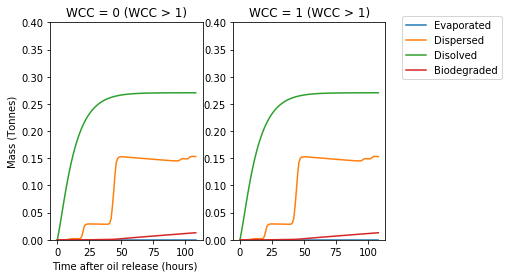

In [7]:
# Focus on the two AK cases and look at dispersed, disolved, biodegraded values (>0). 
# The difference in these runs is that the left has very negative evporation rates while the right side has evaporation set to zero when negative

plot_data = [15,18,24,37]
fig, axs = plt.subplots(1,2)

# right panel: fixed evap algorithm for EC-AK
axs[0].plot(data_ecAKfix2D[range(109), plot_data[0]])
axs[0].plot(data_ecAKfix2D[range(109), plot_data[1]])
axs[0].plot(data_ecAKfix2D[range(109), plot_data[2]])
axs[0].plot(data_ecAKfix2D[range(109), plot_data[3]])

# left panel: EC-AK
axs[1].plot(data_ecAKwccfix2D[range(109), plot_data[0]])
axs[1].plot(data_ecAKwccfix2D[range(109), plot_data[1]])
axs[1].plot(data_ecAKwccfix2D[range(109), plot_data[2]])
axs[1].plot(data_ecAKwccfix2D[range(109), plot_data[3]])

axs[0].set_ylabel('Mass (Tonnes)')
axs[0].set_xlabel('Time after oil release (hours) ')
axs[0].set_ylim([0, 0.4])
axs[1].set_ylim([0, 0.4])
axs[1].legend(['Evaporated', 'Dispersed','Disolved','Biodegraded'], loc='upper right', bbox_to_anchor= (1.8, 1.05))
axs[0].set_title('WCC = 0 (WCC > 1)')
axs[1].set_title('WCC = 1 (WCC > 1)')

plt.savefig('MB_BunkerC_AK_2panel_WCC_comparison.png')